In [2]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame



plotsize = (15,6)


## Data Reading

Reading the data from the *MTFF Graphs English.xlsx* file and loading the information for Graph 3.13

In [5]:
data_g313 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.13.", skiprows = 21, usecols = "B:O", header = 0, nrows = 4)

data_g313.rename({"Concepto": 'KPI',
                 2023 : '2023',
                '2024*' : '2024',
                '2025*' : '2025',
                '2026*' : '2026',
                '2027*' : '2027',
                '2028*' : '2028',
                '2029*' : '2029',
                '2030*' : '2030',
                '2031*' : '2031',
                '2032*' : '2032',
                '2033*' : '2033',
                '2034*' : '2034',
                '2035*' : '2035'}, axis = 1, inplace = True)

print(data_g313)

                 KPI  2023  2024  2025  2026  2027  2028  2029  2030  2031  \
0     Aggregate Debt  60.3  60.4  61.6  61.6  61.2  60.9  60.6  60.3  60.2   
1  Consolidated Debt  53.8  54.9  56.0  56.0  55.6  55.4  55.0  54.7  54.6   
2           Net Debt  47.8  48.2  50.2  50.2  49.8  49.6  49.3  49.0  48.9   
3    Primary Balance   1.4   0.2   0.4   0.9   0.8   1.3   1.4   1.4   1.3   

   2032  2033  2034  2035  
0  59.6  59.2  59.0  58.9  
1  54.0  53.6  53.4  53.3  
2  48.3  47.9  47.8  47.7  
3   1.7   1.6   1.4   1.1  


In [7]:
data_g313_graph = pd.melt(data_g313, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g313_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g313_graph

,KPI,Year,% GDP
0,Aggregate Debt,2023,60.3
1,Consolidated Debt,2023,53.8
2,Net Debt,2023,47.8
3,Primary Balance,2023,1.4
4,Aggregate Debt,2024,60.4
5,Consolidated Debt,2024,54.9
6,Net Debt,2024,48.2
7,Primary Balance,2024,0.2
8,Aggregate Debt,2025,61.6
9,Consolidated Debt,2025,56.0


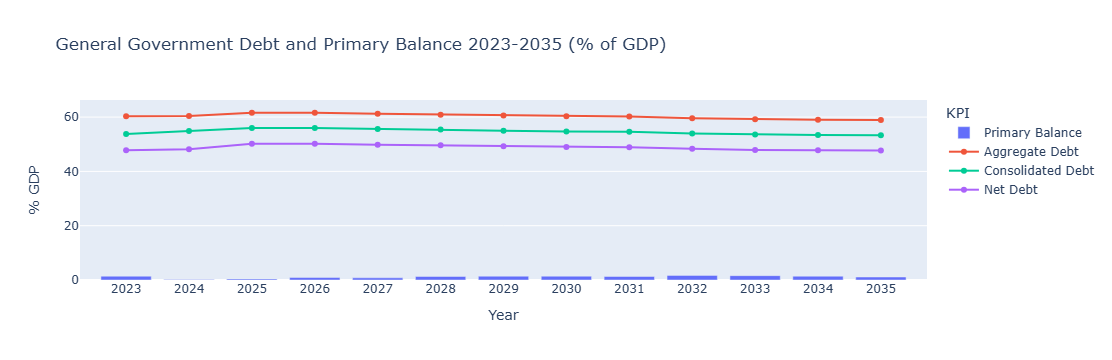

In [9]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = data_g313_graph.copy()

fig = px.bar(df[df.KPI == "Primary Balance"], x="Year", y="% GDP", color="KPI", title="General Government Debt and Primary Balance 2023-2035 (% of GDP)")
fig.add_trace(go.Scatter(x=df[df.KPI == "Aggregate Debt"]['Year'], y=df[df.KPI == "Aggregate Debt"]['% GDP'], name="Aggregate Debt"))
fig.add_trace(go.Scatter(x=df[df.KPI == "Consolidated Debt"]['Year'], y=df[df.KPI == "Consolidated Debt"]['% GDP'], name="Consolidated Debt"))
fig.add_trace(go.Scatter(x=df[df.KPI == "Net Debt"]['Year'], y=df[df.KPI == "Net Debt"]['% GDP'], name="Net Debt"))
fig.show()

fig.write_html('./G313.html')

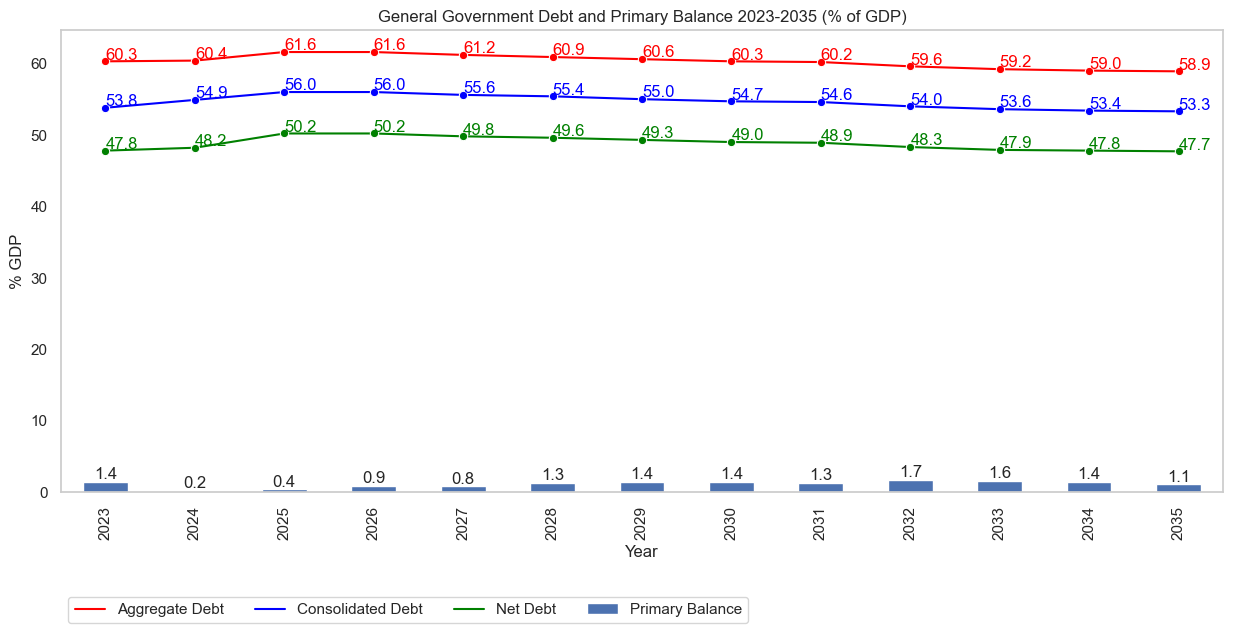

In [11]:
df = data_g313_graph[data_g313_graph.KPI == "Primary Balance"].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

df.plot(kind='bar', stacked=False, ax=ax)

sns.lineplot(x="Year",  y="% GDP", data=data_g313_graph[data_g313_graph.KPI != "Primary Balance"], hue='KPI', ax=ax, marker='o', palette = ['red', 'blue', 'green'])
# legend_line_plot = mlines.Line2D([], [], color="b", label="Primary Balance", marker='o')

df_linea = data_g313_graph[data_g313_graph.KPI == "Aggregate Debt"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'red') # set colour of line
    
    
df_linea = data_g313_graph[data_g313_graph.KPI == "Consolidated Debt"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line
    
df_linea = data_g313_graph[data_g313_graph.KPI == "Net Debt"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'green') # set colour of line


ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncols = 4)
ax.grid(False)
plt.title("General Government Debt and Primary Balance 2023-2035 (% of GDP)")

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [np.round(v.get_height(), 1) for v in c]# [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='edge')

